In [113]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns




In [114]:
file_path = '/content/flipkart_data.csv'
df = pd.read_csv(file_path)


df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [115]:
df.tail()

,review,rating
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5
9975,NiceREAD MORE,5


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9976 entries, 0 to 9975
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  9976 non-null   object
 1   rating  9976 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 156.0+ KB


In [117]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,9976.0,4.215417,1.167911,1.0,4.0,5.0,5.0,5.0


In [118]:
df.shape

(9976, 2)

In [119]:
df.size

19952

In [120]:
df.dtypes

,0
review,object
rating,int64


In [121]:
df.nunique()

,0
review,7694
rating,5


In [122]:
df.isnull().sum()

,0
review,0
rating,0


<Axes: xlabel='rating', ylabel='count'>

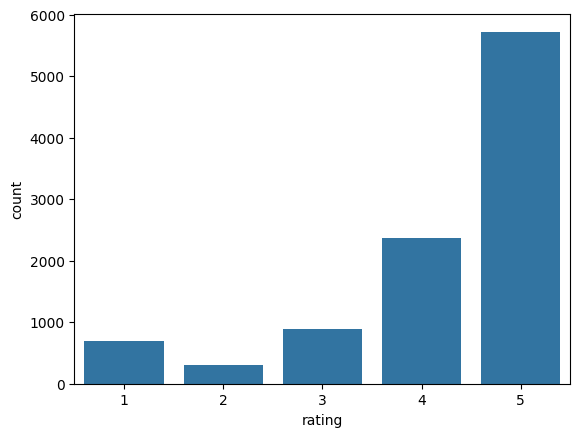

In [123]:
sns.countplot(data=df,x='rating')

In [124]:
df['rating'].value_counts()

,count
rating,
5,5726
4,2365
3,884
1,691
2,310


In [125]:
label_df=df['rating'].value_counts().index


In [126]:
label_df=df['rating'].value_counts().values

([<matplotlib.patches.Wedge at 0x7fc6152f7f50>,
 [Text(-0.25335279745754097, 1.0704262515560978, '5726'),
  Text(-0.38874445125555707, -1.029017857774109, '2365'),
  Text(0.6761231353908002, -0.8676736170872744, '884'),
  Text(1.0075776057583583, -0.44134721974229607, '691'),
  Text(1.0947625053598895, -0.10721500295265568, '310')],
 [Text(-0.13819243497684053, 0.5838688644851442, '57.40%'),
  Text(-0.21204242795757655, -0.5612824678767866, '23.71%'),
  Text(0.36879443748589097, -0.4732765184112405, '8.86%'),
  Text(0.5495877849591044, -0.24073484713216148, '6.93%'),
  Text(0.5971431847417579, -0.05848091070144855, '3.11%')])

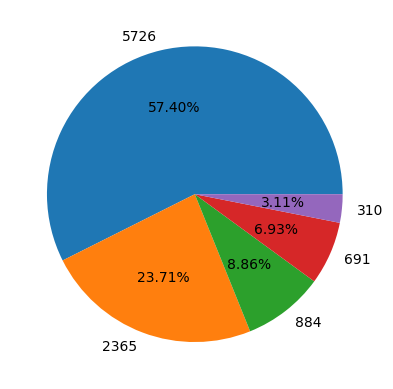

In [127]:
plt.pie(label_df,labels=label_df,autopct='%1.2f%%')

In [128]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def preprocess_reviews_stopwords(df):
    df['review'] = df['review'].str.lower()
    df['review'] = df['review'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
    df['sentiment'] = df['rating'].apply(lambda x: 1 if x >= 4 else 0)
    return df

df_cleaned = preprocess_reviews_stopwords(df)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [129]:
df_cleaned

,review,rating,sentiment
0,nice produt. like design lot. easy carry. and....,5,1
1,awesome sound....very pretty see nd sound qual...,5,1
2,awesome sound quality. pros 7-8 hrs battery li...,4,1
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1
...,...,...,...
9971,goodread,5,1
9972,everything amazimg built light..read,5,1
9973,goodread,5,1
9974,best headphone ever used....read,5,1


In [130]:
label_df=df['sentiment'].value_counts().index

In [131]:
label_df=df['sentiment'].value_counts().values

([<matplotlib.patches.Wedge at 0x7fc61747a2d0>,
 [Text(-0.9118165764179391, 0.6152971078832314, '8091'),
  Text(0.9118167769071365, -0.6152968107756461, '1885')],
 [Text(-0.4973544962279667, 0.3356166042999444, '81.10%'),
  Text(0.49735460558571076, -0.3356164422412615, '18.90%')])

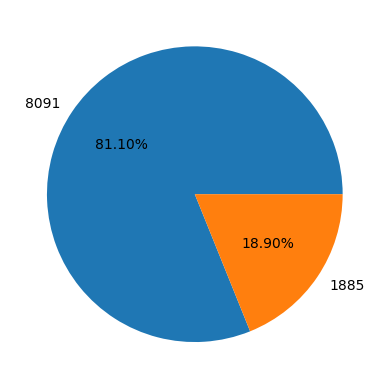

In [132]:
plt.pie(label_df,labels=label_df,autopct='%1.2f%%')

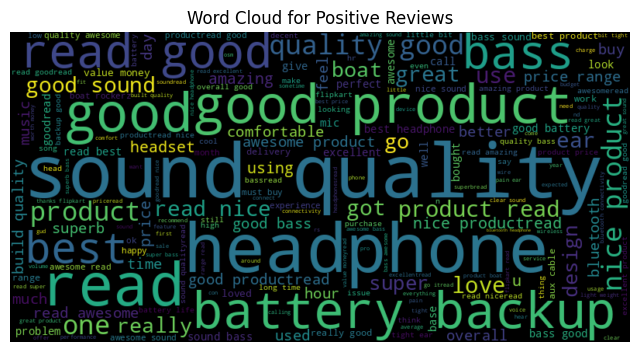

In [133]:
positive_reviews = df_cleaned[df_cleaned['sentiment'] == 1]['review']
positive_text = ' '.join(positive_reviews)
wordcloud = WordCloud(width=800, height=400).generate(positive_text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()


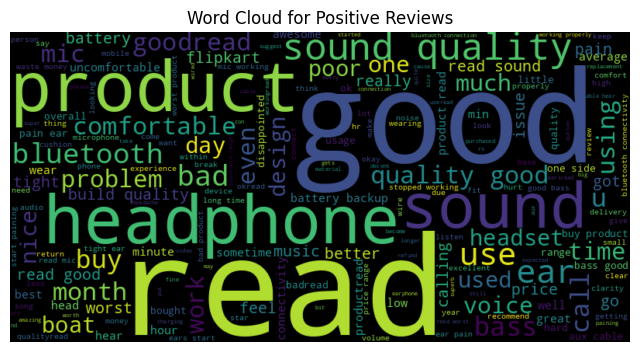

In [134]:
negative_reviews = df_cleaned[df_cleaned['sentiment'] == 0]['review']
negative_text = ' '.join(negative_reviews)
wordcloud = WordCloud(width=800, height=400).generate(negative_text)

plt.figure(figsize=(8, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df_cleaned['review'])
y = df_cleaned['sentiment']

In [136]:
y

,sentiment
0,1
1,1
2,1
3,1
4,1
...,...
9971,1
9972,1
9973,1
9974,1


In [137]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 88291 stored elements and shape (9976, 5000)>

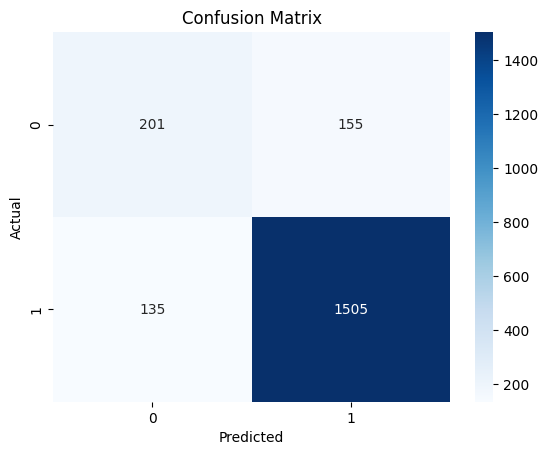

0.8547094188376754


In [138]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(conf_matrix , annot=True,fmt='d', cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
print(accuracy)

In [139]:
from sklearn.ensemble import RandomForestClassifier

In [140]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [141]:
y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.8977955911823647


In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [144]:
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)


Logistic Regression Accuracy: 0.8867735470941884


In [145]:
from sklearn.svm import SVC

In [146]:
model_svm = SVC(random_state=42)
model_svm.fit(X_train, y_train)

SVC(random_state=42)

In [147]:
y_pred_svm = model_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Accuracy: 0.9013026052104208
